# Introduction

A simple notebook to have a look at the predition of heart diseases using Random forrest, for which the feature importance is tested, and XGBoost, for which also cross validation is tested.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

path_to_file = '../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv'

#getting data
X_full = pd.read_csv(path_to_file)
X = X_full.drop(columns=['condition'],axis = 1)
#target
y = X_full.condition

#print(list(X_full.columns))
#X.head(10)

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


Separate test sample and training sample.

In [2]:
# training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

**Random forrest**

The accuracy for training and test sample is printed-out below. Additionally, the feature importance is shown. Here it should be mentioned that the condition was dropped. Otherwise the test accuracy is of course 100% and the feature importance of the quantity shoots up to 70 % or so.

Random forrest train accuracy: 1.000
Random forrest test accuracy: 0.750


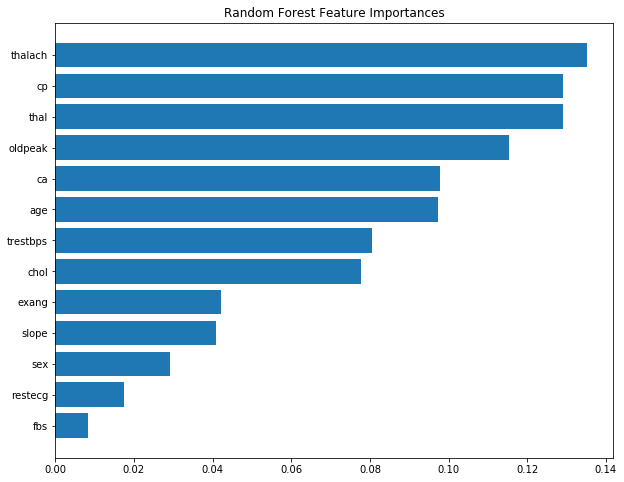

In [3]:
#
# random forrest
#



rf = Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

print("Random forrest train accuracy: %0.3f" % rf.score(X_train, y_train))
print("Random forrest test accuracy: %0.3f" % rf.score(X_valid, y_valid))

#
# feature importance
#
tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

#make plot of feature importance
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

y_ticks = np.arange(0, len(X.columns))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(X.columns[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
plt.show()


**XGBoost**

Check the uncertainty from XGBoost and from cross validation.

In [4]:
#
# xgboost
#
from sklearn.model_selection import GridSearchCV
model1 = XGBRegressor(n_estimators=150, learning_rate=0.05,random_state = 0)
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_valid)
mae1 = mean_absolute_error(y_valid, predictions1)
print('mean absolute error -> ', mae1)

#print(model1.get_params())

#uncertainty when performing cross validation
cv_uncert = -1 * cross_val_score(model1, X, y,cv=10, scoring='neg_mean_absolute_error')
print('uncertainty from cross validation -> ', cv_uncert.mean())

mean absolute error ->  0.2995993584394455
uncertainty from cross validation ->  0.2875805316848316
